In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

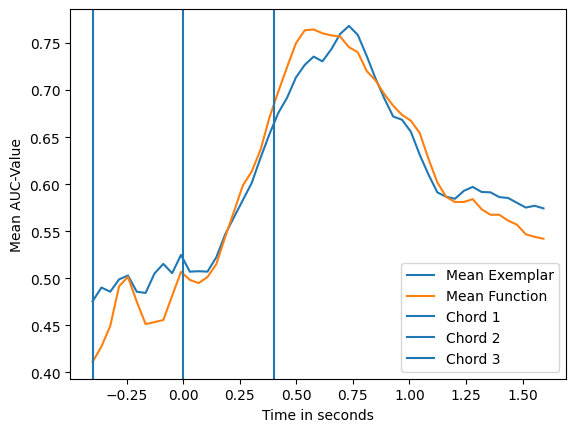

In [4]:
# Step and window size used for generating data
step = 5
window = 13

# Directory where the files are stored
data_dir = "./data"
file_pattern = "auc_roc_sl_13_5_0{}.txt"

# Assuming subject IDs are numeric and sequential, modify as per your data
subject_ids = ["02", "06", "08", "09", "11", "12"] # Replace with actual subject IDs

# List to store data from all subjects
all_roc_exemplar = []
all_roc_function = []

# Process each file
for subject_id in subject_ids:
    file_path = os.path.join(data_dir, file_pattern.format(subject_id))
    if os.path.exists(file_path):
        # Read the data from the file
        data = np.loadtxt(file_path)
        
        # Append the data to the lists
        all_roc_exemplar.append(data[:, 0])
        all_roc_function.append(data[:, 1])

# Convert lists to NumPy arrays for efficient computation
all_roc_exemplar = np.array(all_roc_exemplar)
all_roc_function = np.array(all_roc_function)

# Compute the mean values using NumPy
mean_roc_exemplar = np.mean(all_roc_exemplar, axis=0)
mean_roc_function = np.mean(all_roc_function, axis=0)

# Generate the time vector
time = [i * step / 128 - 0.4 for i in range(len(mean_roc_exemplar))]

# Plotting
plt.plot(time, mean_roc_exemplar, label="Mean Exemplar")
plt.plot(time, mean_roc_function, label="Mean Function")
plt.axvline(-0.4, label="Chord 1")
plt.axvline(0, label="Chord 2")
plt.axvline(0.4, label="Chord 3")
plt.ylabel("Mean AUC-Value")
plt.xlabel("Time in seconds")
plt.legend()
plt.show()